**Load Dataset**

In [4]:
# Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import warnings

# Install kaggle library
!pip install kaggle

# Upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"smmmmmmmm","key":"7b133f9532960b035175029dd9cafb37"}'}

In [1]:
# Move kaggle.json to the correct folder
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the Credit Card Fraud Detection dataset
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 77% 51.0M/66.0M [00:00<00:00, 84.7MB/s]
100% 66.0M/66.0M [00:00<00:00, 87.0MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [2]:
# Download credit risk dataset
!unzip creditcardfraud.zip -d ./datasets/

Archive:  creditcardfraud.zip
  inflating: ./datasets/creditcard.csv  


In [5]:
# Load dataset
data = pd.read_csv("creditcard.csv")

# Basic information about the dataset
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Data Preprocessing**

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Remove duplicates
data = data.drop_duplicates()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


**Exploratory Data Analysis**


---



Class Distribution

Class
0    283253
1       473
Name: count, dtype: int64


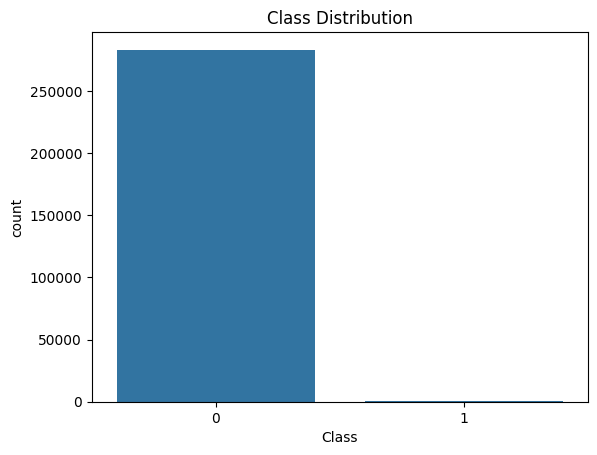

In [ ]:
# Checking for class imbalance
print(data['Class'].value_counts())
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

Correlation heatmap

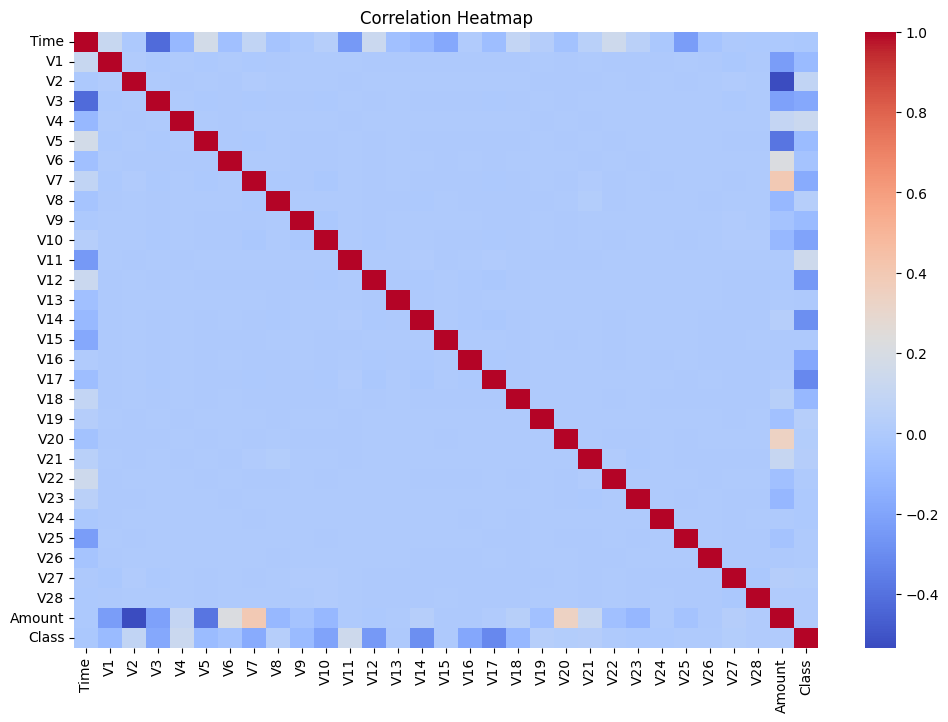

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Distributions of Important Features

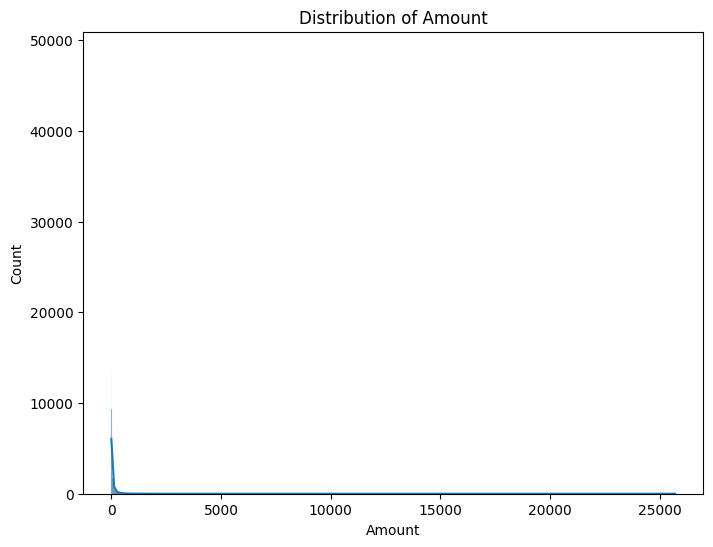

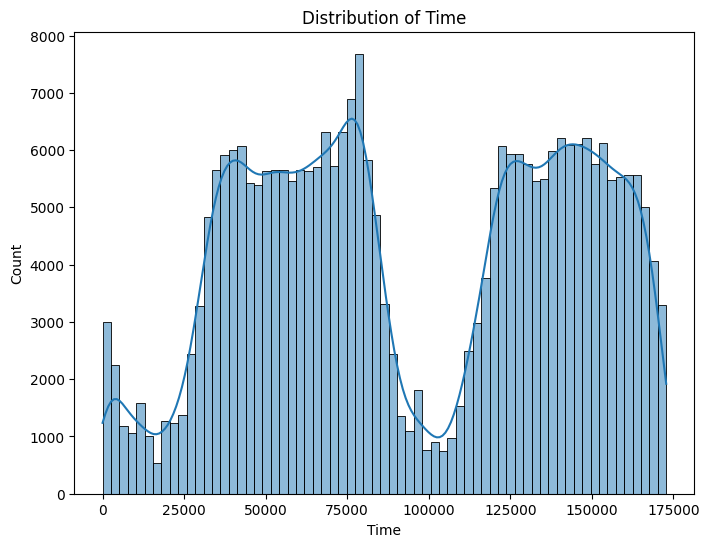

In [ ]:
# Visualizing distributions of important features
for column in ['Amount', 'Time']:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

**Machine Learning Models**


---

Data Preprocessing

In [9]:
# Handle missing values (if any)
data.fillna(data.median(), inplace=True)

# Splitting data into features and target
target = 'Class'
X = data.drop(columns=[target])
y = data[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the Amount and Time features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['Amount', 'Time']] = scaler.fit_transform(X_train[['Amount', 'Time']])
X_test[['Amount', 'Time']] = scaler.transform(X_test[['Amount', 'Time']])


Model Training

In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, 'predict_proba') else None
    results[name] = {'Accuracy': accuracy, 'ROC AUC': roc_auc}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)


                        Accuracy   ROC AUC
Logistic Regression     0.999137  0.956345
Random Forest           0.999507  0.923944
Decision Tree           0.999048  0.852402
Support Vector Machine  0.999348  0.910001


Hyperparameter Tuning

In [10]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time= 1.9min
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time= 1.6min
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time= 1.6min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 3.4min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 3.3min
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time= 3.2min
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time= 6.7min
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time= 6.5min
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time= 6.6min
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time= 1.6min
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time= 1.7min
[CV] END max_depth=None, min_s

Model Evaluation

Best Model Accuracy: 0.9995241955380115
Best Model ROC AUC: 0.9649715850233516


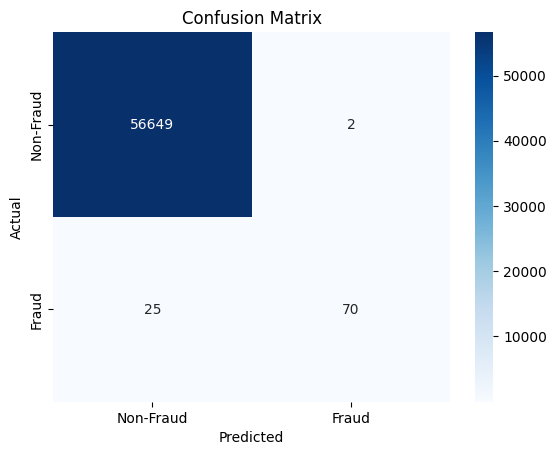

In [ ]:
best_predictions = best_model.predict(X_test)
best_probabilities = best_model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, best_predictions)
roc_auc = roc_auc_score(y_test, best_probabilities)
print(f"Best Model Accuracy: {accuracy}")
print(f"Best Model ROC AUC: {roc_auc}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, best_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()